In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("data/travel_insurance_prediction_train.csv")
#test_df = pd.read_csv("travel_insurance_prediction_test.csv")

# Exploracion del dataset

In [3]:
train_df.head(3)

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0


In [ ]:
#test_df.head(3)

Comenzamos descartando la columna Customers, ya que es solo el id del cliente y no nos aporta información relevante al problema

In [4]:
train_df.drop(['Customer'], axis= 1, inplace=True)
#test_df.drop(['Customer'], axis = 1, inplace=True)

## Analizamos presencia de NaN y los valores de las columnas

In [5]:
train_df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
train_df['Employment Type'].values

array(['Private Sector/Self Employed', 'Private Sector/Self Employed',
       'Private Sector/Self Employed', ...,
       'Private Sector/Self Employed', 'Government Sector',
       'Private Sector/Self Employed'], dtype=object)

In [ ]:
#test_df.isna().sum()

<function matplotlib.pyplot.show(*args, **kw)>

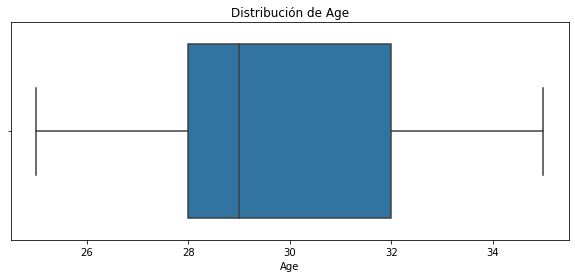

In [7]:
### Age
plt.figure(figsize=(10,4))
sns.boxplot(data=train_df, x=train_df.Age)
plt.title('Distribución de Age')
plt.show

<function matplotlib.pyplot.show>

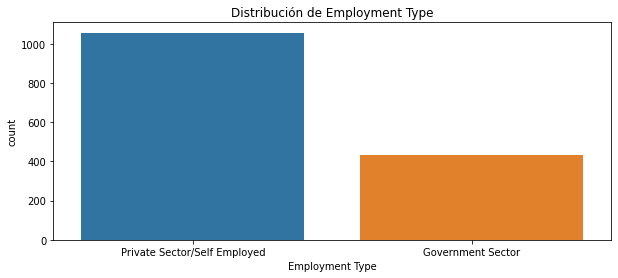

In [ ]:
### Employment Type
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x=train_df['Employment Type'])
plt.title('Distribución de Employment Type')
plt.show

<function matplotlib.pyplot.show>

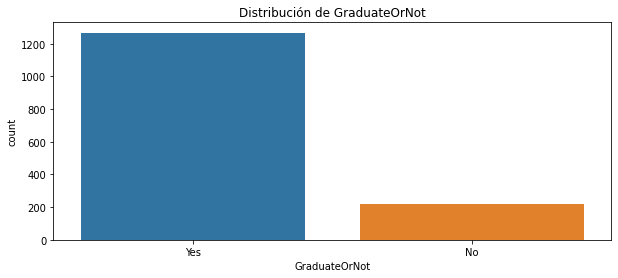

In [ ]:
### GraduateOrNot
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x=train_df['GraduateOrNot'])
plt.title('Distribución de GraduateOrNot')
plt.show

<function matplotlib.pyplot.show>

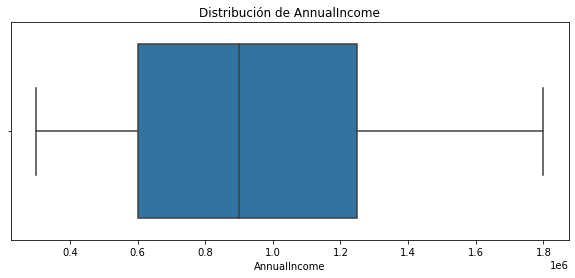

In [ ]:
### Age
plt.figure(figsize=(10,4))
sns.boxplot(data=train_df, x=train_df['AnnualIncome'])
plt.title('Distribución de AnnualIncome')
plt.show

<function matplotlib.pyplot.show>

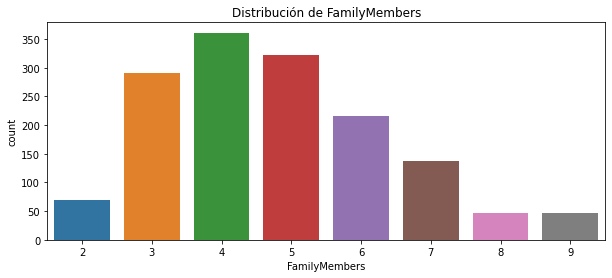

In [ ]:
### FamilyMembers
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x=train_df['FamilyMembers'])
plt.title('Distribución de FamilyMembers')
plt.show

<function matplotlib.pyplot.show>

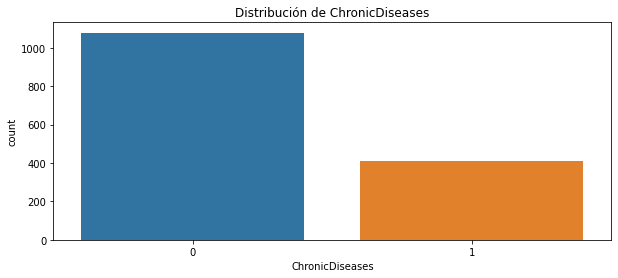

In [ ]:
### ChronicDiseases
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x=train_df['ChronicDiseases'])
plt.title('Distribución de ChronicDiseases')
plt.show

<function matplotlib.pyplot.show>

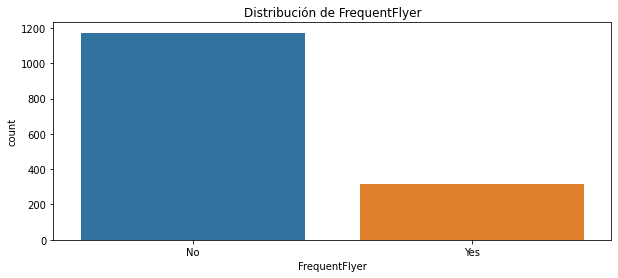

In [ ]:
### FrequentFlyer
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x=train_df['FrequentFlyer'])
plt.title('Distribución de FrequentFlyer')
plt.show

<function matplotlib.pyplot.show>

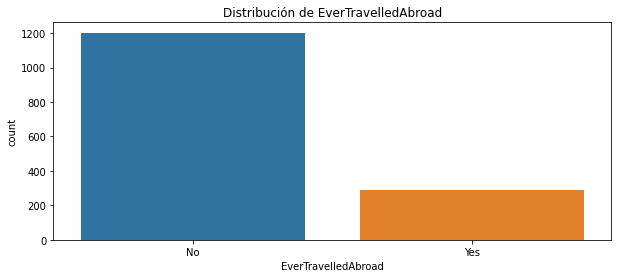

In [ ]:
### EverTravelledAbroad
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x=train_df['EverTravelledAbroad'])
plt.title('Distribución de EverTravelledAbroad')
plt.show

No se presenta ningún valor NaN en ninguno de los datasets, ni tampoco observamos outliers en las distribuciones.

# Exploración de modelos

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

Aplicamos el siguiente *transformer* para genera **X_train**, **y_train** y **X_test**.  

In [134]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")


# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
#X_test = transformer.transform(test_df)

In [69]:
X_train

array([[4., 1., 0., ..., 1., 0., 0.],
       [2., 2., 0., ..., 1., 0., 0.],
       [3., 3., 0., ..., 1., 0., 0.],
       ...,
       [2., 3., 0., ..., 1., 0., 0.],
       [3., 4., 1., ..., 1., 0., 0.],
       [2., 1., 0., ..., 1., 0., 0.]])

In [ ]:
### El baseline que tuvo el profe (mirando solo el macro avg f1 score) de 82.
### Tenemos que superar eso!!!

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

search_params = {
    'n_estimators': [100, 200, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 10, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf':[1,2,3]


}
forest = RandomForestClassifier(random_state=42)
forest_clf = GridSearchCV(forest, search_params, cv=5, scoring='f1', n_jobs=-1)
forest_clf.fit(X_train, y_train)

best_forest_clf = forest_clf.best_estimator_

In [13]:
forest_clf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [14]:
print(classification_report(y_train, best_forest_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       958
           1       0.90      0.73      0.81       532

    accuracy                           0.88      1490
   macro avg       0.88      0.85      0.86      1490
weighted avg       0.88      0.88      0.87      1490



## XGBoost

In [ ]:
!pip install xgboost 
from xgboost import XGBClassifier

search_params = {
    'max_depth': [2,3,4,6,8,10],
    'min_child_weight': [1,2,3,4,5],
    'gamma':[0,0.1,0.2,0.3,0.4,0.5],
    'subsample':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.4,0.5,0.6,0.7,0.8,0.9,1],
    'reg_alpha':[1e-5,1e-3,0.01, 0.1, 1, 10, 100]


}
xgboost = XGBClassifier(learning_rate =0.1, n_estimators=1000, random_state=42)
xgboost_clf = GridSearchCV(xgboost, search_params, cv=5, scoring='f1', n_jobs=-1)
xgboost_clf.fit(X_train, y_train)

best_xgboost_clf = xgboost_clf.best_estimator_

In [ ]:
xgboost_clf.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 3,
 'min_child_weight': 1,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [ ]:
print(classification_report(y_train, best_xgboost_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       958
           1       0.90      0.62      0.73       532

    accuracy                           0.84      1490
   macro avg       0.86      0.79      0.81      1490
weighted avg       0.85      0.84      0.83      1490



In [137]:
#Probamos tunear la tasa de aprendizaje poniendo fijos los parámetros optimos

from xgboost import XGBClassifier
search_params = {'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25,0.3]}

xgboost = XGBClassifier(colsample_bytree = 0.9,
                        gamma = 0.3,
                        max_depth = 3,
                        min_child_weight = 1,
                        reg_alpha = 0.01,
                        subsample = 0.9,
                        n_estimators = 1000,
                        random_state=42)

xgboost_clf = GridSearchCV(xgboost, search_params, cv=5, scoring='f1', n_jobs=-1)
xgboost_clf.fit(X_train, y_train)

best_xgboost_clf = xgboost_clf.best_estimator_

/home/sseppi/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [139]:
best_xgboost_clf = xgboost_clf.best_estimator_
xgboost_clf.best_params_

{'learning_rate': 0.05}

In [140]:
print(classification_report(y_train, best_xgboost_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       958
           1       0.90      0.64      0.75       532

    accuracy                           0.85      1490
   macro avg       0.86      0.80      0.82      1490
weighted avg       0.85      0.85      0.84      1490



In [ ]:
#Probamos tunear todo junto, a ver si encuentra algo distinto

search_params = {
    'max_depth': [2,3,4,6,8,10],
    'min_child_weight': [1,2,3,4,5],
    'gamma':[0,0.1,0.2,0.3,0.4,0.5],
    'subsample':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.4,0.5,0.6,0.7,0.8,0.9,1],
    'reg_alpha':[1e-5,1e-3,0.01, 0.1, 1, 10, 100],
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25,0.3]


}
xgboost = XGBClassifier(n_estimators=1000, random_state=42)
xgboost_clf = GridSearchCV(xgboost, search_params, cv=5, scoring='f1', n_jobs=-1)
xgboost_clf.fit(X_train, y_train)

best_xgboost_clf = xgboost_clf.best_estimator_

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
#bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

search_params = {
    'base_estimator__n_neighbors' : [4,5,6,7, 10],
    'base_estimator__weights': ['uniform', 'distance'],
    'base_estimator__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'base_estimator__p': [1,2],
    'n_estimators' : [10, 50, 100, 200],
    'max_samples' : [ 0.5, 0.6, 0.7,0.8],
    'max_features': [0.5, 0.6,0.7,0.8,0.9]
}

bagging_clf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(), random_state = 42), search_params, cv=5, scoring='f1', n_jobs=-1)
bagging_clf.fit(X_train, y_train)

best_bagging_clf = bagging_clf.best_estimator_

In [ ]:
bagging_clf.best_params_

{'base_estimator__algorithm': 'ball_tree',
 'base_estimator__n_neighbors': 4,
 'base_estimator__p': 2,
 'base_estimator__weights': 'distance',
 'max_features': 0.9,
 'max_samples': 0.8,
 'n_estimators': 50}

In [ ]:
print(classification_report(y_train, best_bagging_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       958
           1       0.93      0.73      0.82       532

    accuracy                           0.88      1490
   macro avg       0.90      0.85      0.87      1490
weighted avg       0.89      0.88      0.88      1490



Primero le hacemos un escalado a las variables numéricas dentro a X_Train, ya que SVM lo necesita asi

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
3

scaler = StandardScaler()

X_train_svm = scaler.fit_transform(X_train)

In [127]:
from sklearn import svm

**Probamos LinearSVC**

In [128]:
search_params = {'C': [0.01,0.1,1,10], 'loss':['hinge', 'squared_hinge'], 'class_weight' : [None, 'balanced']}
svm_clf = GridSearchCV(svm.LinearSVC(random_state = 42), search_params, cv=5, scoring='f1', n_jobs=-1) 

In [129]:
svm_clf.fit(X_train_svm, y_train)
best_svm_clf = svm_clf.best_estimator_
svm_clf.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'loss': 'squared_hinge'}

In [130]:
print(classification_report(y_train, best_svm_clf.predict(X_train_svm)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       958
           1       0.65      0.62      0.64       532

    accuracy                           0.75      1490
   macro avg       0.72      0.72      0.72      1490
weighted avg       0.75      0.75      0.75      1490



**Probamos SVC**

In [131]:
search_params = {'C': [0.01,0.1,1,10],'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] ,
                 'class_weight' : [None, 'balanced'], 'shrinking' : [True , False]}

svm_clf = GridSearchCV(svm.SVC(random_state = 42), search_params, cv=5, scoring='f1', n_jobs=-1)
svm_clf.fit(X_train_svm, y_train)
best_svm_clf = svm_clf.best_estimator_

In [132]:
svm_clf.best_params_

{'C': 10, 'class_weight': None, 'kernel': 'rbf', 'shrinking': True}

In [133]:
print(classification_report(y_train, best_svm_clf.predict(X_train_svm)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       958
           1       0.91      0.65      0.76       532

    accuracy                           0.85      1490
   macro avg       0.87      0.81      0.83      1490
weighted avg       0.86      0.85      0.85      1490



### Conclusiones

Realizamos pruebas con búsqueda de hiperparámetros con los siguientes modelos:

- Random Forest  
- XGBoost
- Bagging de KNN  
- SVM: Linear SVC y SVC  

Obtuvimos los siguientes Macro. Averages:

- SVC 0.83  
- Linear SVC 0.72  
- Bagging 0.87  
- XGBoost 0.82  
- Random Forest 0.86  

Observamos que los mejores resultados dentro de los modelos testeados se lograron con:

1) Bagging, usando los siguientes hiperparámetros:

    {'base_estimator__algorithm': 'ball_tree',
     'base_estimator__n_neighbors': 4,
     'base_estimator__p': 2,
     'base_estimator__weights': 'distance',
     'max_features': 0.9,
     'max_samples': 0.8,
     'n_estimators': 50}
     
2) Random Forest, usando los siguientes hiperparámetros:

    {'criterion': 'entropy',
     'max_depth': None,
     'min_samples_leaf': 1,
     'min_samples_split': 4,
     'n_estimators': 100}
     

Estos resultados son muy buenos, pero es probable que exista _overfitting_ sobre los datos de entrenamiento. Es por ello que es necesario calcular las métricas de error contratando contra el conjunto de Test, al cual en este caso particular no tuvimos acceso.